$\textbf{Autor rozwiązania: Piotr Koneczny (numer indeksu: 258086). Rozwiązanie pisałem i testowałem na wersji Pythona: 3.13.2.}$

# Implementacja podstawowych funkcji grafowych

In [21]:
#Importujemy potrzebne biblioteki
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [22]:
#Definiujemy główną klasę Graph
class Graph:
    def __init__(self, vertices:list = None, matrix:np.array = None, graph_dict:dict = None, \
                 n_to_generate = 10, p_to_generate = 1/3, generate_cycle:bool = False):
        self.vertices = vertices
        self.matrix = matrix
        self.graph_dict = graph_dict

        self.n = None

        self.n_to_generate = n_to_generate
        self.p_to_generate = p_to_generate
        self.generate_cycle = generate_cycle

        if self.matrix is None and self.graph_dict is not None:
            self.vertices, self.matrix = self.graph_to_matrix(self.graph_dict, return_vertices = True)
            self.n = len(self.matrix)
        elif self.graph_dict is None:
            if self.matrix is not None:
                if self.matrix.shape[0] != self.matrix.shape[1]:
                    raise Exception("Użytkowniku! Podana macierz sąsiedztwa musi być macierzą kwadratową.")
                self.matrix = np.array(self.matrix).astype(int)
                self.n = len(self.matrix)
            else:
                self.generate_graph()
            self.vertices, self.graph_dict = self.matrix_to_graph(self.vertices, self.matrix, return_vertices = True)
        elif self.matrix is not None and self.graph_dict is not None:
            raise Exception("Użytkowniku! Zdecyduj się. Albo podajesz tylko matrix, albo tylko graph_dict. Możesz też opcjonalnie podać vertices.")

    def generate_graph(self):
        self.n = self.n_to_generate
        self.vertices = list(range(1, self.n + 1))  # Wierzchołki od 1 do n
        self.matrix = np.zeros((self.n, self.n), dtype=int)
        self.graph_dict = {v: [] for v in self.vertices}  # Inicjalizacja pustego grafu

        for i in range(self.n):  # Przechodzimy przez każdy wierzchołek (od 1 do n)
            if not self.generate_cycle:  # Jeśli chcemy cykl, dodajemy dodatkowe krawędzie
                for j in range(i):  # Łączymy tylko wcześniejsze wierzchołki (nie powtarzamy)
                    if np.random.random() < self.p_to_generate:
                        self.add_edge(False, self.vertices[i], self.vertices[j])
            else:
                if i != self.n-1:
                    self.add_edge(False, i+1, i+2)
                else:
                    self.add_edge(False, self.n, 1)
            
    def matrix_to_graph(self, vertices:list, matrix:np.array, return_vertices:bool = True):
        n = len(matrix)
        graph_dict = dict()
        if (vertices is None) or (len(vertices) != n):
            Warning("Użytkowniku! Podałeś nieodpowiednią ilość nazw dla wierzchołków. Staną się więc one liczbami w zakresie od 1 do {} włącznie.".format(n))
            vertices = list(range(1,n+1))
        for i in range(n):
            indexes_of_i_neighbors = list()
            for j in range(n):
                if matrix[i,j]:
                    indexes_of_i_neighbors.append(j)
            i_neighbors = [vertices[index] for index in indexes_of_i_neighbors]
            graph_dict[vertices[i]] = i_neighbors
        if return_vertices:
            return vertices, graph_dict
        else:
            return graph_dict
        
    def graph_to_matrix(self, graph_dict:dict, return_vertices:bool = True):
        vertices = list(graph_dict.keys())
        n = len(vertices)
        matrix = np.zeros(shape = (n,n), dtype=int)

        for vertex in vertices:
            for neighbor in graph_dict[vertex]:
                matrix[vertices.index(vertex), vertices.index(neighbor)] += 1
        
        if return_vertices:
            return vertices, matrix
        else:
            return matrix
        
    def print_matrix(self):
        """
        Wypisuje na ekranie graf podany jako macierz sąsiedztwa
        """
        print("-"*30)
        if self.vertices is not None:
            print("Vertices (wierzchołki):", self.vertices)
        if self.matrix is not None:
            print("Matrix (macierz sąsiedztwa):\n", self.matrix)
        else:
            raise Exception("Nie można wyświetlić macierzy sąsiedztwa, gdyż jest to obiekt typu NoneType.")
        print("-"*30)

    def print_graph(self, draw = True):
        """
        Wypisuje na ekranie graf podany jako lista sąsiedztwa (słownik pythona)
        Domyślnie też rysuje graf za pomocą biblioteki networkx
        """
        print("-"*30)
        print("Dla każdego wierzchołka, lista jego sąsiadów:")
        if self.graph_dict is not None:
            for vertex in self.graph_dict:
                print(vertex, ":", end = " ")
                for elem in self.graph_dict[vertex]:
                    print(elem, end = " ")
                print()
        else:
            raise Exception("Nie można wyświetlić grafu w takiej formie, jak w graph_dict, gdyż jest to obiekt typu NoneType.")
        print("-"*30)
        if draw:
            self.draw_graph()

    def draw_graph(self):
        if self.graph_dict is None:
            raise Exception("Nie można narysować grafu, gdyż jego postać graph_dict jest obiektem typu NoneType.")
        
        edges_to_draw = list()
        vertices_to_draw = list()
        
        for vertex in self.graph_dict:
            vertices_to_draw.append(vertex)
            if len(self.graph_dict[vertex]) > 0:
                for elem in self.graph_dict[vertex]:
                    edges_to_draw.append((vertex, elem))

        draw = nx.Graph()
        draw.add_edges_from(edges_to_draw)
        draw.add_nodes_from(vertices_to_draw)
        nx.draw_networkx(draw)
        plt.show()

    def add_vertex(self, vertex):
        """
        Nowy wierzchołek do istniejącego grafu
        """
        if self.vertices is None:
            self.vertices = list()
        if vertex not in self.vertices:
            self.vertices.append(vertex)
        
            #Rozbudowa macierzy oraz graph_dict w wyniku dodania wierzchołka - to co dodajemy, wypełniamy zerami
            if self.matrix is None:
                self.matrix = np.zeros(shape=(1,1),dtype=int)
            else:
                self.matrix = np.concat([self.matrix,np.zeros(shape=(self.n,1),dtype=int)], axis = 1)
                self.matrix = np.concat([self.matrix,np.zeros(shape=(1,self.n+1),dtype=int)], axis = 0)
            self.n = len(self.matrix)
            self.vertices, self.graph_dict = self.matrix_to_graph(self.vertices, self.matrix, return_vertices=True)

    def add_edge(self, is_arc:bool = False, *edge):
        """
        W przypadku gdy podamy is_arc = False:
        Nowa krawędź (podana jako para wierzchołków) do istniejącego grafu.
        Rozważamy grafy proste, nieskierowane, (bez pętli)

        W przypadku gdy podamy is_arc = True:
        Nowy łuk (podany jako para wierzchołków) do istniejącego grafu.
        Rozważamy grafy proste, skierowane
        """
        if len(edge) != 2:
            raise Exception("Użytkowniku! Musisz podać dwa wierzchołki, oddzielając je przecinkiem.")
        
        u, v = edge
        if u == v:
            raise ValueError("Pętla! Bo podano dwa identyczne wierzchołki.")
        self.add_vertex(u)
        self.add_vertex(v)
        if v not in self.graph_dict[u]:
            self.graph_dict[u].append(v)
            self.matrix[self.vertices.index(u),self.vertices.index(v)] += 1
        if not is_arc and u not in self.graph_dict[v]:
            self.graph_dict[v].append(u)
            self.matrix[self.vertices.index(v),self.vertices.index(u)] += 1    

# Przykłady użycia podstawowych funkcji grafowych

------------------------------
Vertices (wierzchołki): ['a', 'b', 'c', 'd', 'e']
Matrix (macierz sąsiedztwa):
 [[0 1 1 0 0]
 [1 0 1 1 0]
 [1 1 0 0 1]
 [1 1 0 0 0]
 [0 1 0 0 0]]
------------------------------
------------------------------
Dla każdego wierzchołka, lista jego sąsiadów:
a : b c 
b : a c d 
c : a b e 
d : a b 
e : b 
------------------------------


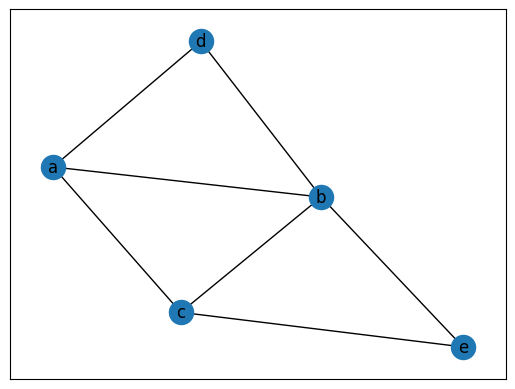

In [23]:
#Przykład użycia kodu - definiowanie grafu za pomocą vertices oraz matrix i automatyczne konwertowanie na graph_dict
vertices1 = ["a","b","c","d","e"]
matrix1 = np.array([[0,1,1,0,0],
                   [1,0,1,1,0],
                   [1,1,0,0,1],
                   [1,1,0,0,0],
                   [0,1,0,0,0]])
G1 = Graph(vertices=vertices1, matrix=matrix1)
G1.print_matrix()
G1.print_graph()

------------------------------
Vertices (wierzchołki): ['a', 'b', 'c', 'd', 'e', 'g', 'f']
Matrix (macierz sąsiedztwa):
 [[0 1 1 0 0 0 1]
 [1 0 1 1 0 0 0]
 [1 1 0 0 1 0 0]
 [1 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]]
------------------------------
------------------------------
Dla każdego wierzchołka, lista jego sąsiadów:
a : b c f 
b : a c d 
c : a b e 
d : a b 
e : b 
g : 
f : a 
------------------------------


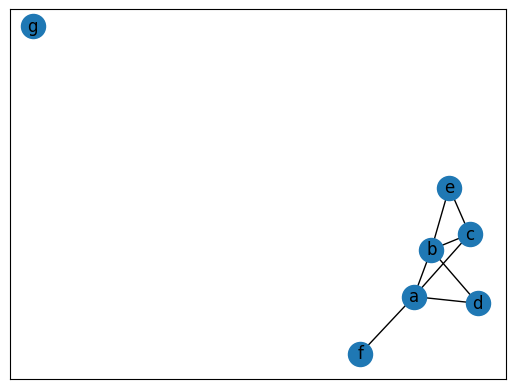

In [24]:
G1.add_vertex('g')
G1.add_edge(False, 'f','a')
G1.print_matrix()
G1.print_graph()

------------------------------
Vertices (wierzchołki): ['a', 'b', 'c', 'd', 'e', 'g', 'f']
Matrix (macierz sąsiedztwa):
 [[0 1 1 0 0 0 1]
 [1 0 1 1 0 0 0]
 [1 1 0 0 1 0 0]
 [1 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0]
 [1 0 0 0 0 0 0]]
------------------------------
------------------------------
Dla każdego wierzchołka, lista jego sąsiadów:
a : b c f 
b : a c d 
c : a b e 
d : a b 
e : b 
g : e 
f : a 
------------------------------


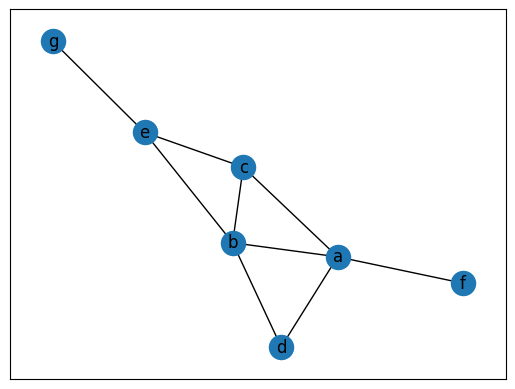

In [25]:
G1.add_edge(True, 'g','e')
G1.print_matrix()
G1.print_graph()

------------------------------
Vertices (wierzchołki): ['a', 'b', 'c', 'd', 'e']
Matrix (macierz sąsiedztwa):
 [[0 1 1 0 0]
 [1 0 1 1 0]
 [1 1 0 0 1]
 [1 1 0 0 0]
 [0 1 0 0 0]]
------------------------------
------------------------------
Dla każdego wierzchołka, lista jego sąsiadów:
a : b c 
b : a c d 
c : a b e 
d : a b 
e : b 
------------------------------


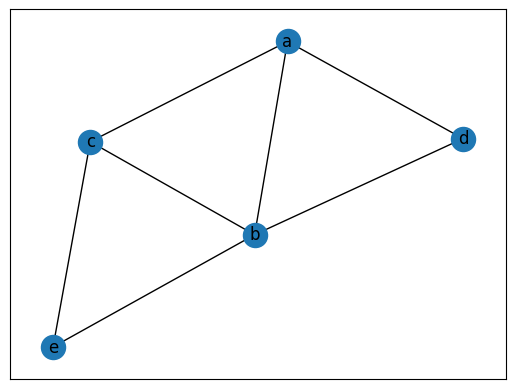

In [26]:
#Przykład użycia kodu - definiowanie grafu za pomocą graph_dict i automatyczne konwertowanie na vertices oraz matrix
graph_dict2 = {'a': ['b', 'c'],
 'b': ['a', 'c', 'd'],
 'c': ['a', 'b', 'e'],
 'd': ['a', 'b'],
 'e': ['b']}
G2 = Graph(graph_dict=graph_dict2)
G2.print_matrix()
G2.print_graph()

# Tworzenie grafów losowych $G(n,p)$

In [27]:
def random_graph(n:int,p:float, vertices = None):
    if n <= 0:
        raise Exception("Użytkowniku! Podana liczba n musi być dodatnia, całkowita, nie mniejsza niż 1.")
    if not 0<=p<=1:
        raise Exception("Użytkowniku! Prawdopodobieństwo p musi być z przedziału [0,1].")
    random_graph = Graph(n_to_generate=n, p_to_generate=p, generate_cycle=False, vertices=vertices)
    return random_graph

------------------------------
Vertices (wierzchołki): [1, 2, 3, 4, 5, 6]
Matrix (macierz sąsiedztwa):
 [[0 0 0 1 0 1]
 [0 0 0 1 0 0]
 [0 0 0 0 0 0]
 [1 1 0 0 1 0]
 [0 0 0 1 0 1]
 [1 0 0 0 1 0]]
------------------------------
------------------------------
Dla każdego wierzchołka, lista jego sąsiadów:
1 : 4 6 
2 : 4 
3 : 
4 : 1 2 5 
5 : 4 6 
6 : 1 5 
------------------------------


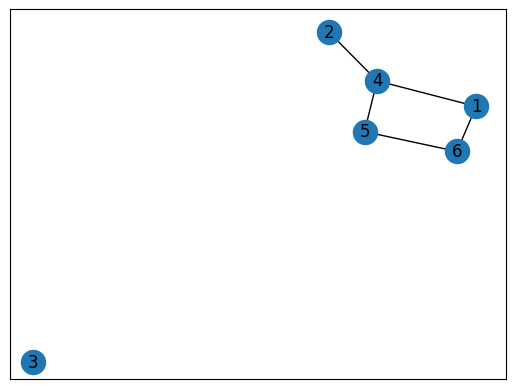

In [28]:
#Przykład użycia kodu - generowanie losowego grafu
n = 6
p = 0.25
Gnp = random_graph(n,p)
Gnp.print_matrix()
Gnp.print_graph()

# Tworzenie cyklu o $n$ wierzchołkach

In [29]:
def cycle(n:int, vertices=None):
    if n <= 2:
        raise Exception("Użytkowniku! Podana liczba n musi być dodatnia, całkowita, nie mniejsza niż 3.")
    cycle = Graph(n_to_generate=n, generate_cycle=True, vertices=vertices)
    return cycle

------------------------------
Vertices (wierzchołki): [1, 2, 3, 4, 5, 6, 7, 8]
Matrix (macierz sąsiedztwa):
 [[0 1 0 0 0 0 0 1]
 [1 0 1 0 0 0 0 0]
 [0 1 0 1 0 0 0 0]
 [0 0 1 0 1 0 0 0]
 [0 0 0 1 0 1 0 0]
 [0 0 0 0 1 0 1 0]
 [0 0 0 0 0 1 0 1]
 [1 0 0 0 0 0 1 0]]
------------------------------
------------------------------
Dla każdego wierzchołka, lista jego sąsiadów:
1 : 2 8 
2 : 1 3 
3 : 2 4 
4 : 3 5 
5 : 4 6 
6 : 5 7 
7 : 6 8 
8 : 1 7 
------------------------------


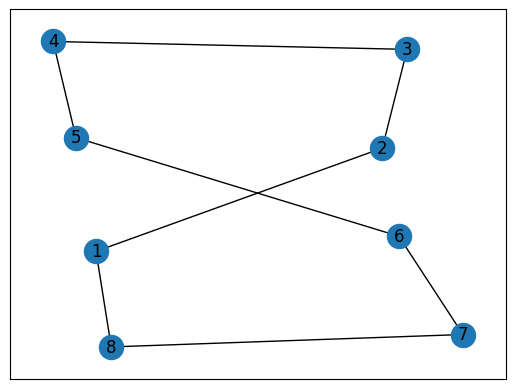

In [30]:
#Przykład użycia kodu - generowanie cyklu
n = 8
vertices = ['A','B','C','D','E','F']
Cn = cycle(n=8, vertices=vertices)
Cn.print_matrix()
Cn.print_graph()